parameters using Gradient Descent:: [[-0.0498]
 [-0.913 ]
 [ 0.8159]
 [-0.4352]
 [-0.052 ]
 [ 0.0386]
 [ 0.4439]
 [ 1.6175]
 [-1.0491]
 [-0.5425]
 [ 0.9907]
 [-0.7921]
 [-0.7605]]
(53,) (53,)
confusion matrix using gradient descent(my implementaion) : 
[[12  7]
 [ 5 29]]
fscore (mine) 0.6666666666666666
Accuracy of Logistic Regression: 77.35849056603774
confusion matrix using sklrn : 
[[13  6]
 [ 5 29]]
fscore (sklrn) 0.7027027027027026
Accuracy of Logistic Regression: 79.24528301886792


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


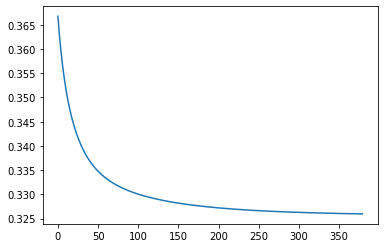

In [3]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,Kneighboursclassifiers

def featureScale(x): return (x-np.average(x))/(x.std())
#age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
ip=pd.read_csv("heart.csv")

y = np.array(ip['target'])
x = np.array(ip.loc[:, ip.columns != 'target'])
#x=np.insert(x, 0, np.ones(y.size), axis=1)

x[:,[0]]/=10
x[:,[3,4,7]]/=100

m=250
xtrain=x[:m]
ytrain=y[:m]
ytrain=np.reshape(ytrain,(ytrain.size,1))
xtest=x[m:]
ytest=y[m:]

numitr=4000
alpha=0.1
lam=0.3

theta=np.transpose(np.array([np.ones(13)]))
def cost(x,y,theta,lam):
    hy=1/(1+np.exp(-x.dot(theta)))
    #theta[0]=0
    J=(np.transpose(y)).dot(np.log(hy))+(np.transpose(1-y)).dot(np.log(1-hy))
    reg=theta**2
    c=lam*0.5*np.sum(reg)
    return (c-J[0][0])/y.size
def grad(x,y,theta,alpha):
    hy=1/(1+np.exp(-x.dot(theta)))
    theta[0]=0
    val=(np.transpose(x)).dot(hy-y)+lam*theta
    #val=np.transpose(np.transpose(hy-y).dot(x))
    val*=alpha/y.size
    return val[:]
J=[]

for i in range(numitr):
    if(i%10==0): J.append(cost(xtrain,ytrain,theta,lam))
    theta=theta*(1-alpha/ytrain.size)-grad(xtrain,ytrain,theta,alpha)
print("parameters using Gradient Descent::",np.around(theta,decimals=4))
plt.plot(J[20:])
hy=1/(1+np.exp(-xtest.dot(theta)))
hy=[int(i>=0.5) for i in hy]
hy = np.array(hy) 
pred=hy
print(ytest.shape,pred.shape)
def fscore(conf):
    return 1/(1+(conf[0][1]+conf[1][0])/(2*conf[0][0]))
#print("Cost using Gradient Descent:",round(J[-1],8))

lr = LogisticRegression()
model = lr.fit(xtrain, ytrain)
lr_predict = lr.predict(xtest)
mypred=confusion_matrix(ytest, pred)
print("confusion matrix using gradient descent(my implementaion) : ")
print(mypred)
print("fscore (mine)",fscore(mypred))
lr_conf_matrix = confusion_matrix(ytest, lr_predict)
myscore = accuracy_score(ytest, pred)
print("Accuracy of Logistic Regression:",myscore*100)
lr_acc_score = accuracy_score(ytest, lr_predict)
print("confusion matrix using sklrn : ")
print(lr_conf_matrix)
print("fscore (sklrn)",fscore(lr_conf_matrix))
print("Accuracy of Logistic Regression:",lr_acc_score*100)
